In [6]:
import pandas as pd

file_path = r'C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Base .Csv\erione-usuarios.csv'

df = pd.read_csv(file_path, sep=',')

output_file_name = 'Colaboradores_Erione_Modelo.xlsx'

output_directory = r'C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Colaboradores_Modelo'

output_path = f'{output_directory}\\{output_file_name}'

df.to_excel(output_path, index=False)

In [7]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from pathlib import Path
from datetime import datetime
import logging
from typing import Dict, List

INPUT_FILE_PATH = Path(r'C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Colaboradores_Modelo\Colaboradores_Erione_Modelo.xlsx')
OUTPUT_DIRECTORY = Path(r'C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Controle_Mensais\Erione')

COLUNAS_PARA_REMOVER = [
    'DirSyncEnabled',
    'ID do Objeto',
    'Nome',
    'Sobrenome',
    'Data/hora de criação',
    'Carimbo de data/hora da exclusão reversível.',
    'Título',
    'Departamento',
    'Localização de dados preferida',
    'Cidade',
    'CountryOrRegion',
    'Office',
    'StateOrProvince',
    'Local de uso',
    'Última execução do dirsync',
    'A senha nunca expira',
    'Carimbo de data/hora da última alteração de senha',
    'Telefone Celular',
    'Número de telefone',
    'CEP',
    'Idioma preferencial',
    'Endereço',
    'Fax',
    'Endereços de proxy'
]

RENOMEAR_COLUNAS = {
    'Nome para exibição': 'Nome do Colaborador',
    'Nome UPN': 'Email',
    'Bloquear credencial': 'Conta desativada',
    'Licenças': 'licencas',
}

# Configurar logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def carregar_dados(file_path: Path) -> pd.DataFrame:
    """Carrega e prepara os dados iniciais do arquivo Excel."""
    if not file_path.exists():
        raise FileNotFoundError(f"Arquivo não encontrado: {file_path}")
    
    logger.info(f"Carregando dados de {file_path}")
    df = pd.read_excel(file_path)
    
    # Verificar se todas as colunas para renomear existem
    missing_columns = [col for col in RENOMEAR_COLUNAS if col not in df.columns]
    if missing_columns:
        logger.warning(f"Colunas não encontradas no DataFrame: {missing_columns}")
    
    df = df.drop(columns=COLUNAS_PARA_REMOVER, errors='ignore')
    df = df.rename(columns=RENOMEAR_COLUNAS)
    return df

def processar_licencas(df: pd.DataFrame) -> pd.DataFrame:
    """Processa as colunas de licenças usando MultiLabelBinarizer."""
    if 'licencas' not in df.columns:
        logger.warning("Coluna 'licencas' não encontrada - pulando processamento")
        return df
    
    logger.info("Processando coluna de licenças")
    df['licencas'] = df['licencas'].apply(lambda x: x.split('+') if isinstance(x, str) else [])
    
    mlb = MultiLabelBinarizer()
    binary_licenses = mlb.fit_transform(df['licencas'])
    binary_licenses_df = pd.DataFrame(binary_licenses, columns=mlb.classes_)
    binary_licenses_df = binary_licenses_df.replace({1: "VERDADEIRO", 0: "FALSO"})
    
    df = pd.concat([df, binary_licenses_df], axis=1)
    
    # Reorganizar colunas
    colunas = list(df.columns)
    colunas.remove('licencas')
    
    if 'Não licenciado' in colunas:
        colunas.remove('Não licenciado')
        colunas.insert(3, 'Não licenciado')
    
    colunas.insert(11, 'licencas')
    
    return df[colunas].drop(columns=['licencas'], errors='ignore')

def salvar_resultado(df: pd.DataFrame, output_dir: Path) -> Path:
    """Salva o dataframe processado em um arquivo Excel."""
    output_dir.mkdir(parents=True, exist_ok=True)
    current_date = datetime.now().strftime('%Y-%m-%d')
    output_file_name = f'Colaboradores_Erione_Modelo_{current_date}.xlsx'
    output_file_path = output_dir / output_file_name
    
    df.to_excel(output_file_path, index=False)
    logger.info(f"Arquivo salvo com sucesso: {output_file_path}")
    return output_file_path

def main():
    try:
        logger.info("Iniciando processamento do arquivo de colaboradores")
        
        df = carregar_dados(INPUT_FILE_PATH)

        df = processar_licencas(df)

        salvar_resultado(df, OUTPUT_DIRECTORY)
        
        logger.info("Processamento concluído com sucesso")
        
    except Exception as e:
        logger.error(f"Ocorreu um erro durante o processamento: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    main()

INFO:__main__:Iniciando processamento do arquivo de colaboradores
INFO:__main__:Carregando dados de C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Colaboradores_Modelo\Colaboradores_Erione_Modelo.xlsx
INFO:__main__:Processando coluna de licenças
INFO:__main__:Arquivo salvo com sucesso: C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Controle_Mensais\Erione\Colaboradores_Erione_Modelo_2025-05-06.xlsx
INFO:__main__:Processamento concluído com sucesso


## RELATORIOS:

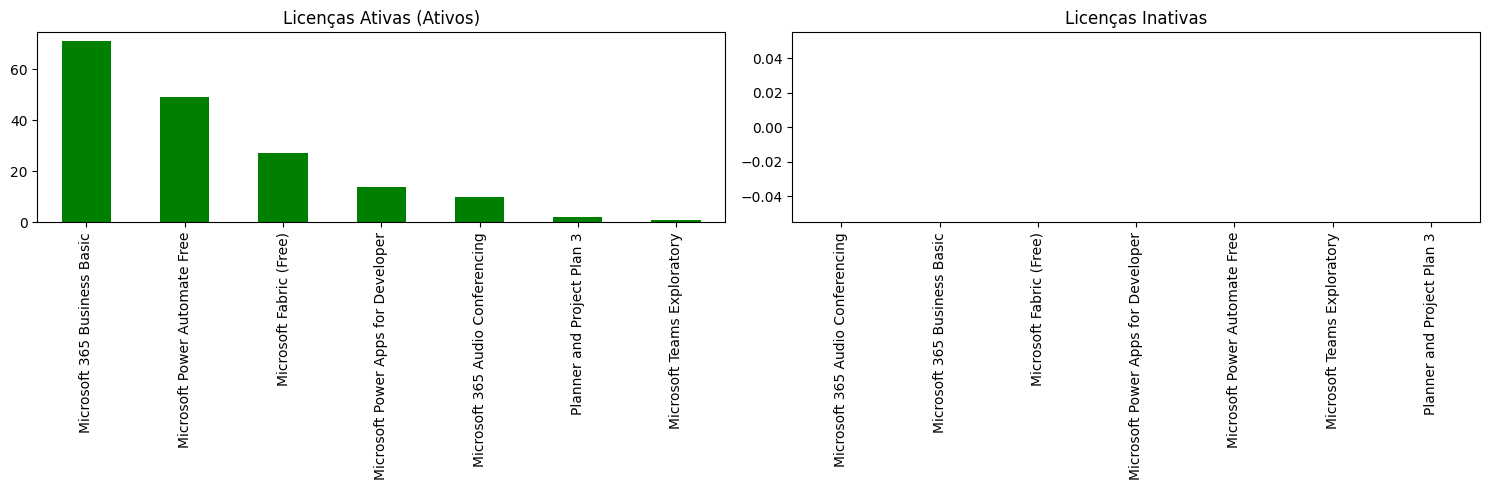

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados (exemplo com seu arquivo)
df_ativos = pd.read_excel(r"C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Controle_Mensais\Erione\Colaboradores_Erione - Abril 2025.xlsx", sheet_name="Ativos")
df_inativos = pd.read_excel(r"C:\Users\Erione Technologies\ERIVAL TELECOM COM E REPRES LT\IT Operations - ERIONE - Documentos\Interno\ControleColaboradores\Controle_Mensais\Erione\Colaboradores_Erione - Abril 2025.xlsx", sheet_name="Inativos")

# 2. Converter "VERDADEIRO"/"FALSO" para 1/0
licencas_colunas = [
    "Microsoft 365 Audio Conferencing",
    "Microsoft 365 Business Basic",
    "Microsoft Fabric (Free)",
    "Microsoft Power Apps for Developer",
    "Microsoft Power Automate Free",
    "Microsoft Teams Exploratory",
    "Planner and Project Plan 3"
]

for coluna in licencas_colunas:
    df_ativos[coluna] = df_ativos[coluna].map({"VERDADEIRO": 1, "FALSO": 0})
    df_inativos[coluna] = df_inativos[coluna].map({"VERDADEIRO": 1, "FALSO": 0})

# 3. Contar licenças ativas/inativas
licencas_ativos = df_ativos[licencas_colunas].sum().sort_values(ascending=False)
licencas_inativos = df_inativos[licencas_colunas].sum()  # Para verificar resíduos

# 4. Gráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
licencas_ativos.plot(kind='bar', ax=ax[0], title='Licenças Ativas (Ativos)', color='green')
licencas_inativos.plot(kind='bar', ax=ax[1], title='Licenças Inativas', color='red')
plt.tight_layout()
plt.savefig('Distribuicao_Licencas.png')  # Salvar gráfico

# 5. Exportar resumo para Excel
with pd.ExcelWriter('Resumo_Licencas_Abril2025.xlsx') as writer:
    # Resumo de licenças
    pd.DataFrame(licencas_ativos).to_excel(writer, sheet_name='Resumo Ativos')
    
    # Inconsistências (ex: ativos marcados como "Não licenciado")
    inconsistencias = df_ativos[df_ativos["Não licenciado"] == "VERDADEIRO"]
    inconsistencias.to_excel(writer, sheet_name='Inconsistências')